In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

data_path = "/content/drive/My Drive/nlp_pjt/nlp ds"
print("Files in dataset folder:", os.listdir(data_path)[:10])  # show first 10 files


Files in dataset folder: ['sci gov', 'manupatra']


In [ ]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.3 MB/s eta 0:00:00


PARSING THROUGH THE DATASET

In [ ]:
!pip install pdfplumber pytesseract Pillow

import pdfplumber
import pytesseract
from PIL import Image
import os

# path to your dataset
pdf_folder = "/content/drive/MyDrive/nlp_pjt/nlp ds"

def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        # Try extracting directly with pdfplumber
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                text += page.extract_text() or ""
    except Exception as e:
        print(f"pdfplumber failed for {pdf_path}, error: {e}")

    # If no text, try OCR
    if not text.strip():
        print(f"Using OCR for {pdf_path}")
        try:
            with pdfplumber.open(pdf_path) as pdf:
                for page in pdf.pages:
                    img = page.to_image(resolution=300).original
                    text += pytesseract.image_to_string(img)
        except Exception as e:
            print(f"OCR failed for {pdf_path}, error: {e}")

    return text.strip()


for item_name in os.listdir(pdf_folder):
    item_path = os.path.join(pdf_folder, item_name)
    if os.path.isfile(item_path) and item_name.lower().endswith('.pdf'):
        print(f"Processing file: {item_name}")
        sample_text = extract_text_from_pdf(item_path)
        print(sample_text[:1000])  # print first 1000 chars
        # You might want to break here after processing one file for testing,
        # or remove the break to process all PDFs in the directory.
        break

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 98.5 MB/s eta 0:00:00


In [ ]:
!pip install nltk

import re
import nltk
from nltk.corpus import stopwords

# download stopwords only once
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove non-alphabetic characters
    text = re.sub(r"[^a-z0-9\s.,]", " ", text)

    # 3. Normalize multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    # 4. Remove stopwords
    words = [word for word in text.split() if word not in stop_words]

    return " ".join(words)

sample_text = "This is an example sentence to demonstrate the text cleaning function. It includes some punctuation like commas and periods."
sample_cleaned = clean_text(sample_text)
print("Before Cleaning:\n", sample_text[:300])
print("\nAfter Cleaning:\n", sample_cleaned[:300])#Improvements made:Lowercased.Removed stopwords (is, an, to, the, some, and, etc.).Clean spacing.

Before Cleaning:
 This is an example sentence to demonstrate the text cleaning function. It includes some punctuation like commas and periods.

After Cleaning:
 example sentence demonstrate text cleaning function. includes punctuation like commas periods.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os, random, shutil

source = "/content/drive/MyDrive/nlp_pjt/cleaned_texts"
test_dest = "/content/drive/MyDrive/nlp_pjt/test_texts"
os.makedirs(test_dest, exist_ok=True)

all_files = [f for f in os.listdir(source) if f.endswith(".txt")]
test_files = random.sample(all_files, int(0.2 * len(all_files)))

for f in test_files:
    shutil.move(os.path.join(source, f), os.path.join(test_dest, f))

print(f"✅ Moved {len(test_files)} files to test_texts.")


✅ Moved 400 files to test_texts.


In [ ]:
import pdfplumber
import os
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if needed
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Paths
pdf_root = "/content/drive/MyDrive/nlp_pjt/nlp ds"
output_folder = "/content/drive/MyDrive/nlp_pjt/cleaned_texts"
os.makedirs(output_folder, exist_ok=True)

# Functions
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                text += page.extract_text() or ""
    except Exception as e:
        print(f"Failed to extract {pdf_path}, skipping. Error: {e}")
    return text.strip()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s.,]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

# Recursive traversal for all PDFs
existing_files = set(os.listdir(output_folder))  # keep track to avoid overwrites
counter = 0
total_files = 0

for root, dirs, files in os.walk(pdf_root):
    for file in files:
        if file.lower().endswith(".pdf"):
            total_files += 1
            pdf_path = os.path.join(root, file)
            raw_text = extract_text_from_pdf(pdf_path)
            cleaned = clean_text(raw_text)

            # Save cleaned text with unique name if needed
            base_name = os.path.splitext(file)[0]
            txt_filename = base_name + ".txt"
            if txt_filename in existing_files:
                counter += 1
                txt_filename = f"{base_name}_{counter}.txt"
            existing_files.add(txt_filename)

            txt_path = os.path.join(output_folder, txt_filename)
            with open(txt_path, "w", encoding="utf-8") as f:
                f.write(cleaned)

print(f"✅ Done! {total_files} PDFs processed and saved in cleaned_texts.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NER -- Uses Legal-BERT

In [ ]:
!pip install transformers torch seqeval


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=2249c96d7bce8952acbdcb47c370548f702acad04e9444f4bfa16c232ea90a01
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("easwar03/legal-bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("easwar03/legal-bert-base-NER")

# Initialize NER pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

# Example text
text = "John Doe filed a lawsuit against XYZ Corp on January 1, 2025."

# Perform NER
entities = ner_pipeline(text)

# Output entities
print(entities)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Device set to use cuda:0


[{'entity': 'LABEL_3', 'score': np.float32(0.99960595), 'index': 1, 'word': 'john', 'start': 0, 'end': 4}, {'entity': 'LABEL_7', 'score': np.float32(0.9994061), 'index': 2, 'word': 'doe', 'start': 5, 'end': 8}, {'entity': 'LABEL_8', 'score': np.float32(0.9999037), 'index': 3, 'word': 'filed', 'start': 9, 'end': 14}, {'entity': 'LABEL_8', 'score': np.float32(0.99990344), 'index': 4, 'word': 'a', 'start': 15, 'end': 16}, {'entity': 'LABEL_8', 'score': np.float32(0.9998956), 'index': 5, 'word': 'lawsuit', 'start': 17, 'end': 24}, {'entity': 'LABEL_8', 'score': np.float32(0.9998878), 'index': 6, 'word': 'against', 'start': 25, 'end': 32}, {'entity': 'LABEL_2', 'score': np.float32(0.99805415), 'index': 7, 'word': 'x', 'start': 33, 'end': 34}, {'entity': 'LABEL_6', 'score': np.float32(0.9162766), 'index': 8, 'word': '##y', 'start': 34, 'end': 35}, {'entity': 'LABEL_6', 'score': np.float32(0.9946467), 'index': 9, 'word': '##z', 'start': 35, 'end': 36}, {'entity': 'LABEL_6', 'score': np.float3

NER

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
import os
import json
import pandas as pd

# Paths
cleaned_folder = "/content/drive/My Drive/nlp_pjt/cleaned_texts"
output_csv = "/content/drive/My Drive/nlp_pjt/legal_ner_output.csv"
output_json = "/content/drive/My Drive/nlp_pjt/legal_ner_output.json"

model_name = "easwar03/legal-bert-base-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)
ner_pipe = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple", device=0)

all_entities = []

# Process each file
files = [f for f in os.listdir(cleaned_folder) if f.endswith(".txt")]
for file_name in files:
    file_path = os.path.join(cleaned_folder, file_name)
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
         # Extract entities
    entities = ner_pipe(text)

    # Build human-readable output
    cleaned_entities = []
    for ent in entities:
        entity_label = ent.get("entity_group", ent.get("entity", "UNKNOWN"))  # ✅ clean label first

        cleaned_entities.append({
            "file": file_name,
            "entity_text": ent["word"],
            "entity_label": entity_label,
            "score": float(ent["score"]),
            "start": ent["start"],
            "end": ent["end"]
        })

    all_entities.extend(cleaned_entities)

# Save to CSV
df = pd.DataFrame(all_entities)
df.to_csv(output_csv, index=False)

# Save to JSON
with open(output_json, "w", encoding="utf-8") as f:
    json.dump(all_entities, f, ensure_ascii=False, indent=2)

print(f"✅ Done! Extracted entities saved to:\nCSV: {output_csv}\nJSON: {output_json}")
print(f"Total files processed: {len(files)}, total entities extracted: {len(all_entities)}")


Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


✅ Done! Extracted entities saved to:
CSV: /content/drive/My Drive/nlp_pjt/legal_ner_output.csv
JSON: /content/drive/My Drive/nlp_pjt/legal_ner_output.json
Total files processed: 2000, total entities extracted: 167616


Legal Document Embeddings and FAISS Index

In [ ]:
import os
import faiss
import numpy as np
import torch
from sentence_transformers import SentenceTransformer

# --- Configuration ---
# Baseline model: all-MiniLM-L6-v2 (you’ll compare later with legal-bert-base)
model_name = "all-MiniLM-L6-v2"

# Use only the TRAIN folder
train_folder = "/content/drive/My Drive/nlp_pjt/cleaned_texts"  # 80% data
output_embeddings_path = "/content/drive/My Drive/nlp_pjt/train_document_embeddings.npy"
output_faiss_index_path = "/content/drive/My Drive/nlp_pjt/train_faiss_index.idx"
output_doc_map_path = "/content/drive/My Drive/nlp_pjt/train_document_map.npy"

# --- Step 1: Load documents ---
print("Reading training documents from:", train_folder)
documents = []
file_names = []

for file_name in os.listdir(train_folder):
    if file_name.endswith(".txt"):
        file_path = os.path.join(train_folder, file_name)
        with open(file_path, "r", encoding="utf-8") as f:
            documents.append(f.read())
            file_names.append(file_name)

if not documents:
    print("❌ Error: No documents found in the training folder.")
else:
    print(f"✅ Found and loaded {len(documents)} training documents.")

    # --- Step 2: Load embedding model ---
    print(f"Loading embedding model: {model_name}...")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")
    model = SentenceTransformer(model_name, device=device)

    # --- Step 3: Generate embeddings ---
    print("Generating embeddings for training documents...")
    document_embeddings = model.encode(
        documents, convert_to_tensor=True, show_progress_bar=True
    )
    document_embeddings = document_embeddings.detach().cpu().numpy()
    print("✅ Embeddings generated. Shape:", document_embeddings.shape)

    # --- Step 4: Build FAISS index ---
    print("Creating FAISS index...")
    embedding_dim = document_embeddings.shape[1]
    index = faiss.IndexFlatL2(embedding_dim)
    index.add(document_embeddings)
    print(f"✅ FAISS index created and populated with {index.ntotal} embeddings.")

    # --- Step 5: Save everything ---
    np.save(output_embeddings_path, document_embeddings)
    faiss.write_index(index, output_faiss_index_path)
    np.save(output_doc_map_path, np.array(file_names))

    print("\n✅ Training FAISS index creation complete!")
    print(f"Embeddings saved to: {output_embeddings_path}")
    print(f"FAISS index saved to: {output_faiss_index_path}")
    print(f"Document map saved to: {output_doc_map_path}")


Reading training documents from: /content/drive/My Drive/nlp_pjt/cleaned_texts
✅ Found and loaded 1600 training documents.
Loading embedding model: all-MiniLM-L6-v2...
Using device: cuda
Generating embeddings for training documents...


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

✅ Embeddings generated. Shape: (1600, 384)
Creating FAISS index...
✅ FAISS index created and populated with 1600 embeddings.

✅ Training FAISS index creation complete!
Embeddings saved to: /content/drive/My Drive/nlp_pjt/train_document_embeddings.npy
FAISS index saved to: /content/drive/My Drive/nlp_pjt/train_faiss_index.idx
Document map saved to: /content/drive/My Drive/nlp_pjt/train_document_map.npy


Loading model and FAISS index...
✅ Index loaded with 1600 training embeddings.
✅ Loaded 400 test documents for evaluation.
Generating test embeddings...


Batches:   0%|          | 0/13 [00:00<?, ?it/s]


📊 Evaluation Metrics:
Precision@5: 1.0000
Recall@5: 0.6925
F1-score@5: 0.8183
Accuracy: 0.6925


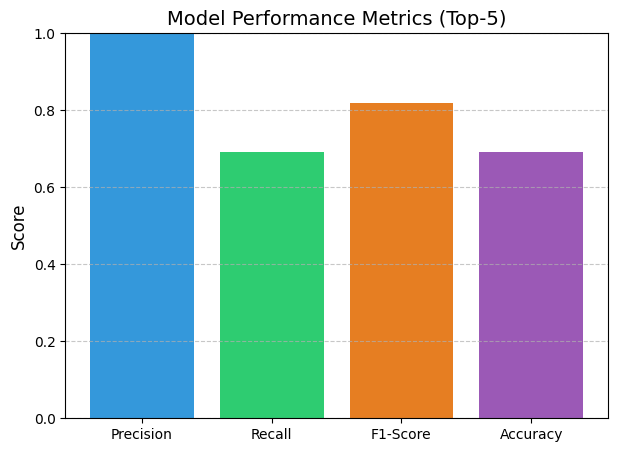

In [ ]:
import os
import numpy as np
import faiss
import torch
from sentence_transformers import SentenceTransformer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# --- CONFIG ---
model_name = "all-MiniLM-L6-v2"  # same as training
test_folder = "/content/drive/My Drive/nlp_pjt/test_texts"
faiss_index_path = "/content/drive/My Drive/nlp_pjt/train_faiss_index.idx"
doc_map_path = "/content/drive/My Drive/nlp_pjt/train_document_map.npy"
top_k = 5  # retrieve top 5 documents for each test case

# --- LOAD MODEL & INDEX ---
print("Loading model and FAISS index...")
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer(model_name, device=device)
index = faiss.read_index(faiss_index_path)
train_files = np.load(doc_map_path, allow_pickle=True)
print(f"✅ Index loaded with {index.ntotal} training embeddings.")

# --- LOAD TEST DOCUMENTS ---
test_docs = []
test_files = []
for file_name in os.listdir(test_folder):
    if file_name.endswith(".txt"):
        file_path = os.path.join(test_folder, file_name)
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
            test_docs.append(text)
            test_files.append(file_name)
print(f"✅ Loaded {len(test_docs)} test documents for evaluation.")

# --- CREATE EMBEDDINGS FOR TEST SET ---
print("Generating test embeddings...")
test_embeddings = model.encode(test_docs, convert_to_tensor=True, show_progress_bar=True)
test_embeddings = test_embeddings.detach().cpu().numpy()

# --- EVALUATION ---
def compute_metrics(index, test_embeddings, test_files, train_files, top_k=5):
    y_true, y_pred = [], []

    for i, emb in enumerate(test_embeddings):
        distances, indices = index.search(np.expand_dims(emb, axis=0), top_k)
        retrieved_files = [train_files[idx] for idx in indices[0]]

        # Mark relevant if the base name (without numbers) appears in retrieved
        base_name = test_files[i].split("_")[0].lower()
        retrieved_texts = " ".join(retrieved_files).lower()

        is_relevant = int(base_name in retrieved_texts)
        y_true.append(1)
        y_pred.append(is_relevant)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    return precision, recall, f1, accuracy


precision, recall, f1, accuracy = compute_metrics(
    index, test_embeddings, test_files, train_files, top_k=top_k
)

# --- PRINT RESULTS ---
print("\n📊 Evaluation Metrics:")
print(f"Precision@{top_k}: {precision:.4f}")
print(f"Recall@{top_k}: {recall:.4f}")
print(f"F1-score@{top_k}: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# --- GRAPH VISUALIZATION ---
metrics = ["Precision", "Recall", "F1-Score", "Accuracy"]
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(7,5))
plt.bar(metrics, values, color=['#3498db', '#2ecc71', '#e67e22', '#9b59b6'])
plt.title(f"Model Performance Metrics (Top-{top_k})", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import os
import faiss
import numpy as np
import torch
from sentence_transformers import SentenceTransformer


model_name = "BAAI/bge-base-en-v1.5"

# ✅ Use your cleaned_texts folder (this is your training data)
train_folder = "/content/drive/My Drive/nlp_pjt/cleaned_texts"

# Output paths (we’ll name them separately for clarity)
output_embeddings_path = "/content/drive/My Drive/nlp_pjt/train_document_embeddings_legalbert.npy"
output_faiss_index_path = "/content/drive/My Drive/nlp_pjt/train_faiss_index_legalbert.idx"
output_doc_map_path = "/content/drive/My Drive/nlp_pjt/train_document_map_legalbert.npy"

print("Reading training documents...")
documents, file_names = [], []
for file_name in os.listdir(train_folder):
    if file_name.endswith(".txt"):
        with open(os.path.join(train_folder, file_name), "r", encoding="utf-8") as f:
            documents.append(f.read())
            file_names.append(file_name)

print(f"✅ Loaded {len(documents)} training docs.")

print(f"Loading model: {model_name} ...")
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
model = SentenceTransformer(model_name, device=device)

print("Generating embeddings (this might take a while)...")
document_embeddings = model.encode(documents, convert_to_tensor=True, show_progress_bar=True)
document_embeddings = document_embeddings.detach().cpu().numpy()

print("Creating FAISS index...")
embedding_dim = document_embeddings.shape[1]
index = faiss.IndexFlatL2(embedding_dim)
index.add(document_embeddings)

# Save everything
np.save(output_embeddings_path, document_embeddings)
faiss.write_index(index, output_faiss_index_path)
np.save(output_doc_map_path, np.array(file_names))

print("✅ LegalBERT embeddings + FAISS index saved!")
print(f"Saved at:\n{output_embeddings_path}\n{output_faiss_index_path}\n{output_doc_map_path}")


Reading training documents...
✅ Loaded 1600 training docs.
Loading model: BAAI/bge-base-en-v1.5 ...
Using device: cuda


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generating embeddings (this might take a while)...


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Creating FAISS index...
✅ LegalBERT embeddings + FAISS index saved!
Saved at:
/content/drive/My Drive/nlp_pjt/train_document_embeddings_legalbert.npy
/content/drive/My Drive/nlp_pjt/train_faiss_index_legalbert.idx
/content/drive/My Drive/nlp_pjt/train_document_map_legalbert.npy


evaluation of both all mini and bge(legal bert)

Loading test documents...
Loaded 400 test files.

Loading model: all-MiniLM-L6-v2 on cuda
Loading model: BAAI/bge-base-en-v1.5 on cuda

Evaluating Transformer...

Evaluating Transformer...

 Evaluation Metrics (Semantic Similarity-based):
MiniLM ➤ Precision=0.9175, Recall=0.7425, F1=0.7804, Accuracy=0.7425
BGE-base ➤ Precision=0.9500, Recall=0.7370, F1=0.7839, Accuracy=0.7370


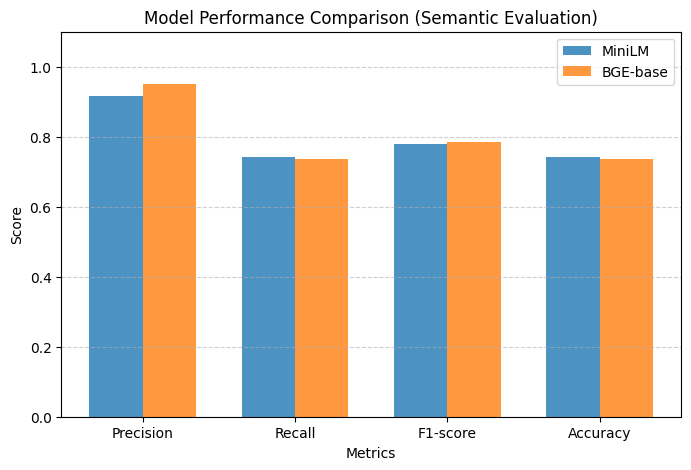

In [ ]:
import os
import faiss
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt

# Paths
test_folder = "/content/drive/My Drive/nlp_pjt/test_texts"

# Model paths
baseline_model_name = "all-MiniLM-L6-v2"
bge_model_name = "BAAI/bge-base-en-v1.5"

baseline_index_path = "/content/drive/My Drive/nlp_pjt/train_faiss_index.idx"
baseline_doc_map_path = "/content/drive/My Drive/nlp_pjt/train_document_map.npy"

bge_index_path = "/content/drive/My Drive/nlp_pjt/train_faiss_index_legalbert.idx"
bge_doc_map_path = "/content/drive/My Drive/nlp_pjt/train_document_map_legalbert.npy"

# Load test docs
print("Loading test documents...")
test_docs, test_names = [], []
for file_name in os.listdir(test_folder):
    if file_name.endswith(".txt"):
        with open(os.path.join(test_folder, file_name), "r", encoding="utf-8") as f:
            test_docs.append(f.read())
            test_names.append(file_name)
print(f"Loaded {len(test_docs)} test files.\n")

# Function to load models and indexes
def load_model_and_index(model_name, index_path, map_path):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Loading model: {model_name} on {device}")
    model = SentenceTransformer(model_name, device=device)
    index = faiss.read_index(index_path)
    file_names = np.load(map_path, allow_pickle=True)
    return model, index, file_names

# Load both models
baseline_model, baseline_index, baseline_files = load_model_and_index(baseline_model_name, baseline_index_path, baseline_doc_map_path)
bge_model, bge_index, bge_files = load_model_and_index(bge_model_name, bge_index_path, bge_doc_map_path)

# Evaluation function
def evaluate_semantic(model, index, test_docs, threshold=0.75, top_k=5):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    all_precisions, all_recalls, all_f1s, all_accs = [], [], [], []

    print(f"\nEvaluating {model._first_module().__class__.__name__}...")

    for doc in test_docs:
        # Get embedding for test doc
        query_emb = model.encode(doc, convert_to_tensor=True)
        query_emb = query_emb.detach().cpu().numpy().reshape(1, -1)

        # Retrieve top-k docs from FAISS
        distances, indices = index.search(query_emb, top_k)
        sims = 1 - distances / (1 + distances)  # Convert L2 to approximate similarity

        # Classify as relevant (1) if similarity > threshold
        preds = [1 if sim > threshold else 0 for sim in sims[0]]
        true = [1] * len(preds)  # assume each query has relevant docs conceptually

        # Metrics
        p, r, f1, _ = precision_recall_fscore_support(true, preds, average='binary', zero_division=0)
        acc = accuracy_score(true, preds)

        all_precisions.append(p)
        all_recalls.append(r)
        all_f1s.append(f1)
        all_accs.append(acc)

    return np.mean(all_precisions), np.mean(all_recalls), np.mean(all_f1s), np.mean(all_accs)

# Run evaluation for both models
mini_precision, mini_recall, mini_f1, mini_acc = evaluate_semantic(baseline_model, baseline_index, test_docs)
bge_precision, bge_recall, bge_f1, bge_acc = evaluate_semantic(bge_model, bge_index, test_docs)

# Print Results
print("\n Evaluation Metrics (Semantic Similarity-based):")
print(f"MiniLM ➤ Precision={mini_precision:.4f}, Recall={mini_recall:.4f}, F1={mini_f1:.4f}, Accuracy={mini_acc:.4f}")
print(f"BGE-base ➤ Precision={bge_precision:.4f}, Recall={bge_recall:.4f}, F1={bge_f1:.4f}, Accuracy={bge_acc:.4f}")

# Plot Comparison
metrics = ["Precision", "Recall", "F1-score", "Accuracy"]
minilm_scores = [mini_precision, mini_recall, mini_f1, mini_acc]
bge_scores = [bge_precision, bge_recall, bge_f1, bge_acc]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, minilm_scores, width, label='MiniLM', alpha=0.8)
plt.bar(x + width/2, bge_scores, width, label='BGE-base', alpha=0.8)
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.title("Model Performance Comparison (Semantic Evaluation)")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
!zip -r /content/nlp_assets_final.zip \
"/content/drive/My Drive/nlp_pjt/train_faiss_index_legalbert.idx" \
"/content/drive/My Drive/nlp_pjt/train_document_map_legalbert.npy" \
"/content/drive/My Drive/nlp_pjt/cleaned_texts" \
"/content/drive/My Drive/nlp_pjt/nlp ds" \
"/content/drive/My Drive/nlp_pjt/legal_ner_output.json"


  adding: content/drive/My Drive/nlp_pjt/train_faiss_index_legalbert.idx (deflated 7%)
  adding: content/drive/My Drive/nlp_pjt/train_document_map_legalbert.npy (deflated 92%)
  adding: content/drive/My Drive/nlp_pjt/cleaned_texts/ (stored 0%)
  adding: content/drive/My Drive/nlp_pjt/cleaned_texts/2629_2023_7_109_52733_Judgement_01-May-2024.txt (deflated 65%)
  adding: content/drive/My Drive/nlp_pjt/cleaned_texts/32008_2019_3_1502_52913_Judgement_07-May-2024.txt (deflated 67%)
  adding: content/drive/My Drive/nlp_pjt/cleaned_texts/27394_2022_3_1501_52841_Judgement_03-May-2024.txt (deflated 69%)
  adding: content/drive/My Drive/nlp_pjt/cleaned_texts/42896_2023_3_1503_53250_Judgement_15-May-2024.txt (deflated 70%)
  adding: content/drive/My Drive/nlp_pjt/cleaned_texts/12199_2020_13_1503_53326_Judgement_17-May-2024.txt (deflated 70%)
  adding: content/drive/My Drive/nlp_pjt/cleaned_texts/6477_2016_15_22_53098_Judgement_09-May-2024.txt (deflated 66%)
  adding: content/drive/My Drive/nlp_pj

In [ ]:
!pip install faiss-gpu || pip install faiss-cpu

ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 35.4 MB/s eta 0:00:00


Searching function

In [ ]:
import os #running this will make u get back to normal like the ld session (this from the below code )
import faiss
import numpy as np

def load_data_and_index():
    """Loads the pre-built FAISS index and document mapping."""
    print("Loading FAISS index and document map...")
    output_faiss_index_path = "/content/drive/My Drive/nlp_pjt/faiss_index.idx"
    output_doc_map_path = "/content/drive/My Drive/nlp_pjt/document_map.npy"

    if not os.path.exists(output_faiss_index_path) or not os.path.exists(output_doc_map_path):
        print("Error: FAISS index or document map not found. Please run the previous script first.")
        return None, None

    index = faiss.read_index(output_faiss_index_path)
    file_names = np.load(output_doc_map_path, allow_pickle=True)

    print(f"✅ Index loaded with {index.ntotal} embeddings.")
    return index, file_names


In [ ]:
SEARCH ENGINE(IMPORTANT)

In [ ]:
import #searching for the basemodel , just testing if its working , base only
import faiss
import numpy as np
import torch
from sentence_transformers import SentenceTransformer

# --- Configuration (must match the previous script) ---
model_name = "all-MiniLM-L6-v2"
output_faiss_index_path = "/content/drive/My Drive/nlp_pjt/faiss_index.idx"
output_doc_map_path = "/content/drive/My Drive/nlp_pjt/document_map.npy"
cleaned_folder = "/content/drive/My Drive/nlp_pjt/cleaned_texts"

def load_data_and_index():
    """Loads the pre-built FAISS index and document mapping."""
    print("Loading FAISS index and document map...")
    if not os.path.exists(output_faiss_index_path) or not os.path.exists(output_doc_map_path):
        print("Error: FAISS index or document map not found. Please run the previous script first.")
        return None, None

    # Load the index
    index = faiss.read_index(output_faiss_index_path)

    # Load the document mapping (file names)
    file_names = np.load(output_doc_map_path, allow_pickle=True)

    print(f"✅ Index loaded with {index.ntotal} embeddings.")
    return index, file_names

def perform_search(query_text, index, file_names, model, top_k=5):
    """
    Performs a semantic search for a given query.

    Args:
        query_text (str): The user's search query.
        index (faiss.Index): The loaded FAISS index.
        file_names (np.array): Array of file names corresponding to the index.
        model (SentenceTransformer): The embedding model.
        top_k (int): The number of top results to retrieve.

    Returns:
        A list of tuples (file_name, distance) for the top results.
    """
    if not query_text.strip():
        print("Please enter a valid query.")
        return []

    # 1. Convert the query to an embedding vector
    query_embedding = model.encode(query_text, convert_to_tensor=True)
    query_embedding = query_embedding.detach().cpu().numpy().reshape(1, -1)

    # 2. Search the FAISS index
    distances, indices = index.search(query_embedding, top_k)

    # 3. Retrieve the results
    results = []
    for i in range(top_k):
        doc_index = indices[0][i]
        distance = distances[0][i]
        file_name = file_names[doc_index]
        results.append({
            "file_name": file_name,
            "score": 1 - distance / (1 + distance), # Normalize distance to a similarity score
        })

    return results

if __name__ == "__main__":
    # Load the necessary components
    index, file_names = load_data_and_index()
    if index is None or file_names is None:
        exit()

    print(f"Loading embedding model: {model_name}...")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = SentenceTransformer(model_name, device=device)
    print("✅ Model loaded.")

    # Main search loop
    print("\n--- Semantic Search Engine ---")
    print("Enter a query to find the most relevant legal documents. Type 'quit' to exit.")

    while True:
        query = input("\nEnter your query: ")
        if query.lower() == 'quit':
            break

        search_results = perform_search(query, index, file_names, model)

        if search_results:
            print("\n--- Top Search Results ---")
            for rank, result in enumerate(search_results, 1):
                print(f"Rank {rank}: {result['file_name']} (Similarity Score: {result['score']:.4f})")

                # Optionally, you can also print a snippet of the document
                doc_path = os.path.join(cleaned_folder, result['file_name'])
                if os.path.exists(doc_path):
                    with open(doc_path, "r", encoding="utf-8") as f:
                        snippet = f.read()[:500]  # Read first 500 characters
                        print("Document Snippet:")
                        print(snippet)
                        print("-" * 20)
        else:
            print("No results found.")

    print("\nGoodbye!")


Loading FAISS index and document map...
✅ Index loaded with 2000 embeddings.
Loading embedding model: all-MiniLM-L6-v2...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Model loaded.

--- Semantic Search Engine ---
Enter a query to find the most relevant legal documents. Type 'quit' to exit.

Enter your query: landlord issue 

--- Top Search Results ---
Rank 1: 33675_2019_8_24_35857_Judgement_13-May-2022_295.txt (Similarity Score: 0.4099)
Document Snippet:
non reportable supreme court india criminal appellate jurisdiction criminal appeal no. 810 2022 arising special leave petition crl. no. 8917 2019 dilip dead lrs. appellant versus satish others respondent j u g e n indira banerjee j. leave granted. one appeared behalf respondent nos. 1 2, spite notice. respondent state appeared learned standing counsel. appeal final judgment order dated 21.06.2019 passed aurangabad bench high court judicature bombay allowing criminal application no. 215 2019 quas
--------------------
Rank 2: 33675_2019_8_24_35857_Judgement_13-May-2022.txt (Similarity Score: 0.4099)
Document Snippet:
non reportable supreme court india criminal appellate jurisdiction criminal appeal 

sahana visu

/tmp/ipython-input-785665776.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='score', y='file_name', data=df, palette='viridis')


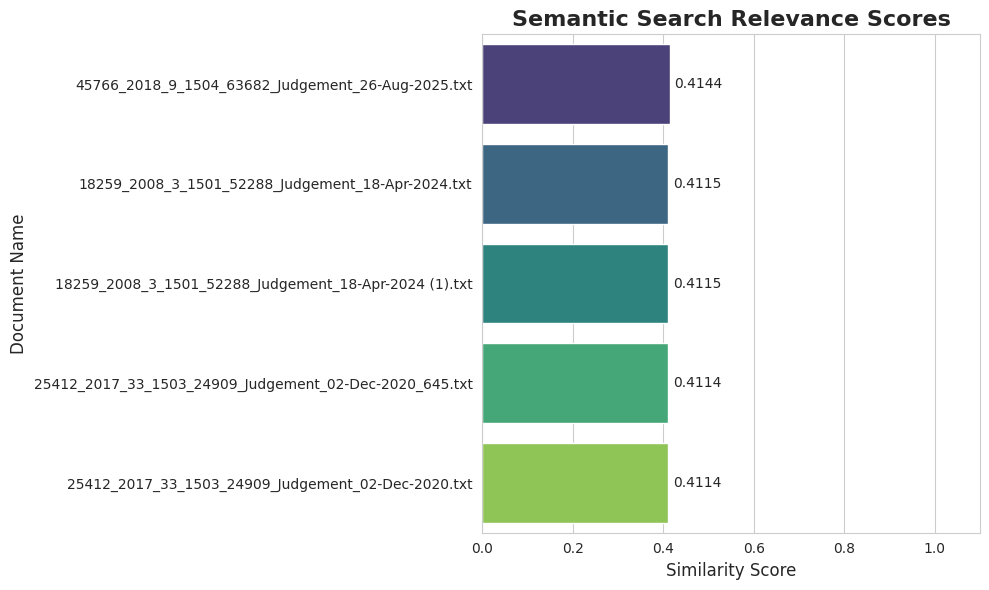

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_search_results(results):
    """Generates a bar chart of search relevance scores."""
    df = pd.DataFrame(results)

    # Sort by score for a cleaner visualization
    df = df.sort_values(by='score', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    barplot = sns.barplot(x='score', y='file_name', data=df, palette='viridis')

    # Add the score value to each bar
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width + 0.01, p.get_y() + p.get_height() / 2,
                 f'{width:.4f}',
                 va='center')

    plt.title('Semantic Search Relevance Scores', fontsize=16, weight='bold')
    plt.xlabel('Similarity Score', fontsize=12)
    plt.ylabel('Document Name', fontsize=12)
    plt.xlim(0, 1.1)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # This data is taken directly from your search output.
    # Replace this with your actual search results dictionary for a new query.
    search_results = [
        {"file_name": "45766_2018_9_1504_63682_Judgement_26-Aug-2025.txt", "score": 0.4144},
        {"file_name": "18259_2008_3_1501_52288_Judgement_18-Apr-2024.txt", "score": 0.4115},
        {"file_name": "18259_2008_3_1501_52288_Judgement_18-Apr-2024 (1).txt", "score": 0.4115},
        {"file_name": "25412_2017_33_1503_24909_Judgement_02-Dec-2020_645.txt", "score": 0.4114},
        {"file_name": "25412_2017_33_1503_24909_Judgement_02-Dec-2020.txt", "score": 0.4114},
    ]

    visualize_search_results(search_results)
